In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from embedding_functions import *
from experiment_setup import *
from functions_for_bootstrap import *
import numba as nb
from scipy.stats import wasserstein_distance
from tqdm import tqdm
import random
from matplotlib.patches import Ellipse

/home/uj21900/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/uj21900/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Use the test with samples drawn from the same distribution - compared to one bootstrap from itself each time

In [2]:
# Network generation --------------------------------------------------------
random.seed(10)
np.random.seed(10)

n = 1000  # number of nodes
K = 4   # number of node communities

# Community labels
tau = np.random.choice(K, n) # order tau would make the nice blocks
tau = np.sort(tau)
# print(tau)

# Generate stochastic block model (SBM) B matrix
"""Just one observation is required"""
B_list = []

B_list.append(np.array([[0.8, 0.1, 0.5, 0.3],
                        [0.4, 0.6, 0.9, 0.2],
                        [0.7, 0.2, 0.4, 0.8],
                        [0.3, 0.5, 0.6, 0.1]]))

In [3]:
# Generate adjacency matrix from the B matrix
As = np.zeros((n, n))
P_list = []

In [4]:
random.seed(100)
np.random.seed(100)

# Get probability matrix from B
P_t = np.column_stack(
    [B_list[0][tau, tau[i]] for i in range(n)])
P_list.append(P_t)

# Generate random graph from the P matrix
A_t = np.random.binomial(n=1, p=P_t)
# turn to integer from float
A_t = A_t.astype(int)
As = A_t

As = As.astype(int)
P = np.column_stack(P_list)

In [5]:
# Generate more samples from the same model with the same parameters (P matrix)
random.seed(100)
np.random.seed(100)

M=300
A_true_draws = []

for m in range(M):
    # Generate random graph from the P matrix
    A_t = np.random.binomial(n=1, p=P_t)
    # turn to integer from float
    A_t = A_t.astype(float)
    As = A_t

    As = As.astype(float)

    A_true_draws.append(As)

In [6]:
d=4

### 1 kNN bootstrap for each draw from the model, $k=5$

In [7]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals = []
A_boots_list_k5 = []

for m in A_true_draws:
    p_val, A_boots = create_single_kNN_bootstrap(m, d=d, Q=1000, n_neighbors=5)
    p_vals.append(p_val)
    A_boots_list_k5.append(A_boots)

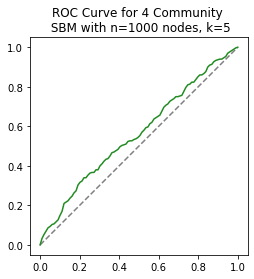

In [8]:
p_hat_list = p_vals
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title("ROC Curve for 4 Community \n SBM with n=1000 nodes, k=5")
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig("4commSBM_knnBootstrap_k5.png")

plt.show()

### 1 kNN bootstrap for each draw from the model, $k=25$

In [9]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals = []
A_boots_list_k25 = []

for m in A_true_draws:
    p_val, A_boots = create_single_kNN_bootstrap(m, d=d, Q=1000, n_neighbors=25)
    p_vals.append(p_val)
    A_boots_list_k25.append(A_boots)

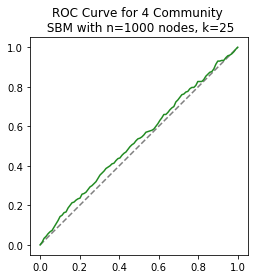

In [10]:
p_hat_list = p_vals
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title("ROC Curve for 4 Community \n SBM with n=1000 nodes, k=25")
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig("4commSBM_knnBootstrap_k25.png", facecolor="white")

plt.show()

### 1 kNN bootstrap for each draw from the model, $k=225$

In [17]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals = []
A_boots_list = []

for m in A_true_draws:
    p_val, A_boots = create_single_kNN_bootstrap(m, d=d, Q=1000, n_neighbors=275)
    p_vals.append(p_val)
    A_boots_list.append(A_boots)

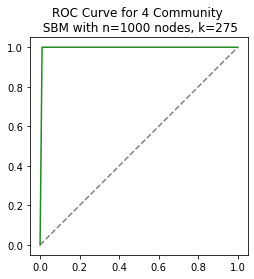

In [18]:
p_hat_list = p_vals
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title("ROC Curve for 4 Community \n SBM with n=1000 nodes, k=275")
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig("4commSBM_knnBootstrap_k275.png", facecolor="white")

plt.show()

### $XX^T$ bootstrap for each draw from the model

In [13]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals = []
A_boots_list = []

for m in A_true_draws:
    p_val, A_boots = create_single_parametric_bootstrap_cropPto0_1range(m,d=d,Q=1000)
    p_vals.append(p_val)
    A_boots_list.append(A_boots)

/home/uj21900/Documents/ResamplingAdjacencyMatrices/functions_for_bootstrap.py:108: UserWarning: P_hat contains values outside of [0,1]. The values outside this range will be clipped to lie in the range.
  warnings.warn("P_hat contains values outside of [0,1]. The values outside this range will be clipped to lie in the range.")


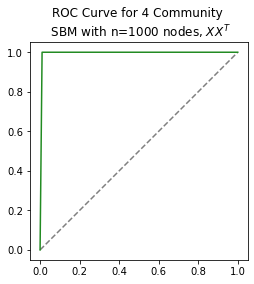

In [14]:
p_hat_list = p_vals
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title("ROC Curve for 4 Community \n SBM with n=1000 nodes, $XX^T$")
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig("4commSBM_XXTbootstrap.png")
plt.show()

### Sample edgelist with replacement bootstrap for each draw from the model

This is essentially just dropping some edges, as any edge selected more than once is set to a 1 as this is a binary setting

In [15]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals = []
A_boots_list = []

Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    A_boots = edgelist_sample_with_replacement(m) 
    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals.append(p_val)
    A_boots_list.append(A_boots[0])

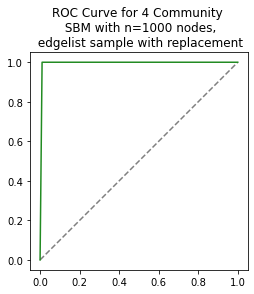

In [16]:
p_hat_list = p_vals
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title("ROC Curve for 4 Community \n SBM with n=1000 nodes,\n edgelist sample with replacement")
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig("4commSBM_edgelistSampleRepBootstrap.png")


plt.show()